In [34]:
import pandas as pd

pls = ["scala", "rust", "python"]

forest = pd.concat([pd.read_csv(f"{pl}_tree_results.csv").assign(pl=lambda _: pl) for pl in pls])
loops = pd.concat([pd.read_csv(f"{pl}_loop_results.csv").assign(pl=lambda _: pl) for pl in pls])


results = pd.concat([forest, loops])
    

,target,type,execution_time,pl
0,840483,binary_tree,6.30,scala
1,693046,binary_tree,0.35,scala
2,382766,binary_tree,0.30,scala
3,109486,binary_tree,0.30,scala
4,1,binary_tree,1.65,scala
5,328616,binary_tree,0.35,scala
6,572512,binary_tree,5.20,scala
7,722399,binary_tree,0.90,scala
8,779157,binary_tree,0.95,scala
9,264845,binary_tree,0.60,scala


In [24]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 8
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target          18 non-null     int64  
 1   type            18 non-null     object 
 2   execution_time  18 non-null     float64
 3   pl              18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes


In [36]:
with open("tests.txt") as f:
    numbers_str = f.read().split(",")
    numbers = [int(n) for n in numbers_str]

percentiles = numbers[:numbers.index(1)]
random_numbers = numbers[numbers.index(1):]

print(percentiles)
print(random_numbers)
print(numbers)

[840483, 572512, 825904, 666079, 779157, 1, 722399, 573422, 693046, 328616, 382766, 51614, 264845, 293550, 256233, 109486]


/Users/apple/IdeaProjects/Knowledge-sharing/programming/Binary Tree/venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



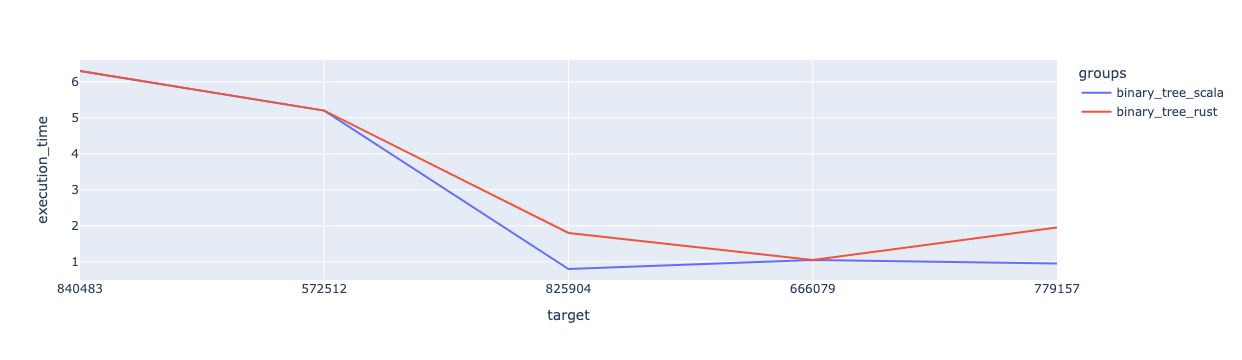

/Users/apple/IdeaProjects/Knowledge-sharing/programming/Binary Tree/venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



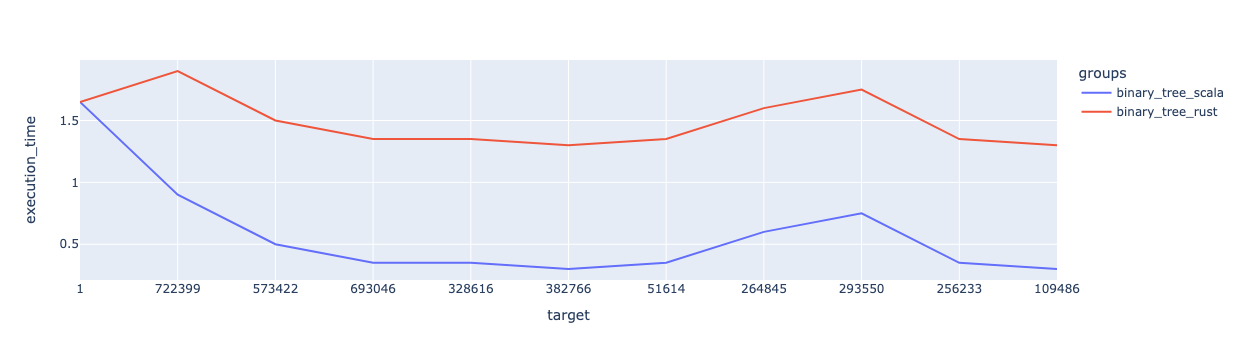

In [49]:
import plotly.express as px

for numbers in [percentiles, random_numbers]:
    result_subset = results[results["target"].isin(numbers)].copy()
    result_subset["i"] = result_subset["target"].apply(lambda x: numbers.index(x))
    result_subset = result_subset.sort_values(by=("i"))
    result_subset["groups"] = result_subset["type"] + "_" + result_subset["pl"]
    fig = px.line(result_subset, x="target", y="execution_time", color='groups')
    fig.update_xaxes(type='category')
    fig.show()